<a href="https://colab.research.google.com/github/ThierrryScotto/twitter_text_classification/blob/main/Twitter_Text_Classification_with_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip uninstall spacy

In [2]:
# !pip install spacy --upgrade
!pip install -q spacy==2.2.3

     |████████████████████████████████| 10.4 MB 4.4 MB/s 
     |████████████████████████████████| 2.2 MB 46.3 MB/s 


In [3]:
import spacy
spacy.__version__

'2.2.3'

In [4]:
!python3 -m spacy download pt

     |████████████████████████████████| 21.2 MB 1.3 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186281 sha256=73adb70ec0c0cb79cba3918d587d5cf7260487b28f1df7ea2ae0336d56bffcf5
  Stored in directory: /tmp/pip-ephem-wheel-cache-6dkdr5jm/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [5]:
import pandas as pd
import string
import random
import seaborn as sns
import numpy as np

# Etapa 2: Carregamento das bases de dados

- Link Kaggle: https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis#TweetsNeutralHash.csv

In [6]:
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding='utf-8')

In [7]:
base_dados.shape

(196, 2)

In [8]:
base_dados[:-5]

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
...,...,...
186,a noite e muito perigosa,medo
187,estou estremecendo com essa casa,medo
188,olha aquela criatura se movendo monstruosamente,medo
189,não aguento este suspense,medo


In [9]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [10]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


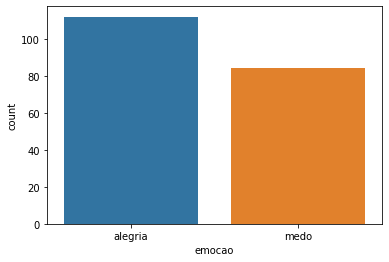

In [11]:
# contar quantos registros existem para cada classe
sns.countplot(base_dados['emocao'], label='Contagem');

# Etapa 3: Função para pré-processamento dos textos

- Letras minúsculas
- Nome do usuário (@)
- URLs
- Espaços em branco
- Emoticons
- Stop words
- Lematização
- Pontuações

In [12]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
from spacy.lang.pt.stop_words  import STOP_WORDS
stop_words = STOP_WORDS

In [14]:
print(stop_words)

{'temos', 'ele', 'todos', 'certamente', 'dão', 'toda', 'cuja', 'doze', 'sabe', 'todas', 'essas', 'põe', 'sexta', 'corrente', 'vossos', 'por', 'caminho', 'embora', 'meus', 'nossas', 'sei', 'final', 'nossa', 'te', 'pelas', 'agora', 'quinze', 'mil', 'onde', 'porém', 'depois', 'porquanto', 'aí', 'este', 'quanto', 'minhas', 'dizer', 'cinco', 'ao', 'comprida', 'falta', 'um', 'fez', 'quinto', 'aqueles', 'pelo', 'fazemos', 'maiorias', 'tiveram', 'dois', 'conselho', 'talvez', 'às', 'uns', 'iniciar', 'grupo', 'seus', 'tão', 'todo', 'em', 'porque', 'naquela', 'dezasseis', 'teus', 'tem', 'fazem', 'vai', 'dezanove', 'sobre', 'somos', 'vezes', 'aos', 'quais', 'aquilo', 'cada', 'mês', 'contudo', 'direita', 'tive', 'devem', 'desse', 'meio', 'vossas', 'ontem', 'da', 'próximo', 'mas', 'quando', 'daquele', 'primeira', 'novos', 'entre', 'lado', 'já', 'favor', 'qualquer', 'saber', 'também', 'terceiro', 'nova', 'apenas', 'debaixo', 'naquele', 'somente', 'estava', 'nossos', 'catorze', 'usa', 'estão', 'vem', 

In [15]:
len(stop_words)

413

In [16]:
pln = spacy.load('pt')

In [17]:
pln

In [18]:
def preprocessamento(texto):
  documento = pln(texto.lower())

  lista = []
  for token in documento:
    # lista.append(token.text)
    lista.append(token.lemma_)

  # tirando as pontuações, digítos e stop words
  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [19]:
teste = preprocessamento("Estou aprendendo 1 processamento de linguagem natural, curso 21 em Curitiba")
teste

'aprender processamento linguagem natural cursar curitiba'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [20]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [21]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [22]:
base_dados['texto'].head(10)

0          trabalhar agradável
1    gostar ficar o aconchegar
2     o adesão o o cursar hoje
3                      admirar
4                 adorar comer
5        adorar cabelar maciar
6            adorar o cor olho
7         somar amável o outro
8          sentir umar afeição
9         querer agradar filho
Name: texto, dtype: object

### Tratamento da classe

In [23]:
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

In [24]:
type(exemplo_base_dados)

list

In [25]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [26]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [27]:
exemplo_base_dados[0][1]['ALEGRIA']

True

In [28]:
type(exemplo_base_dados[0][1])

dict

In [29]:
base_dados_final = []

for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  if emocao == 'alegria':
    dic = {"ALEGRIA": True, "MEDO": False}
  elif emocao == 'medo':
    {"ALEGRIA": False, "MEDO": True}

  base_dados_final.append([texto, dic.copy()])

In [30]:
len(base_dados_final)

196

In [31]:
base_dados_final[0]

['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}]

In [32]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [33]:
type(base_dados_final[0][1])

dict

In [34]:
base_dados_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

# Etapa 5: Criação do classificador

In [35]:
# limpando o modelo
modelo = spacy.blank('pt')

# indicando uma classificação de textos
categorias = modelo.create_pipe("textcat")

# informando os labels
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")

# definido as categorias ao modelo
modelo.add_pipe(categorias)

# armazenamos o resultado
historico = []

In [53]:
modelo.begin_training()

for epoca in range(100):
  random.shuffle(base_dados_final)
  losses = {}

  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{ 'cats': entities } for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)

  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.5046022916465063e-07}


In [54]:
historico

[{'textcat': 0.0038487723795697093}, {'textcat': 1.5046022916465063e-07}]

In [55]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))


In [56]:
historico_loss = np.array(historico_loss)
historico_loss

array([3.84877238e-03, 1.50460229e-07])

Text(0.5, 0, 'Erro')

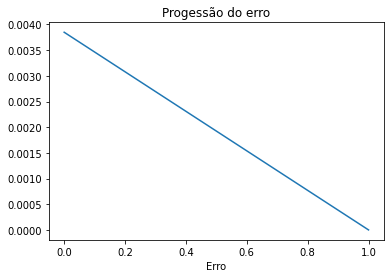

In [57]:
import matplotlib.pyplot as plt

plt.plot(historico_loss)
plt.title("Progessão do erro")
plt.xlabel('Épocas')
plt.xlabel('Erro')

In [58]:
modelo.to_disk("modelo")

# Etapa 6: Testes com uma frase

In [59]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [60]:
texto_positivo = "Eu adoro a cor dos seus olhos"

In [61]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar o cor olho'

In [62]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar o cor olho

In [63]:
previsao.cats

{'ALEGRIA': 0.9994171857833862, 'MEDO': 0.00027319867513142526}

In [64]:
texto_negativo = "o gato tem medo do cachorro"
previsao = modelo_carregado(preprocessamento(texto_negativo))

In [65]:
previsao.cats

{'ALEGRIA': 0.9994168281555176, 'MEDO': 0.0002731804270297289}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [66]:
previsoes = []
for texto in base_dados['texto']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [67]:
previsoes

[{'ALEGRIA': 0.9994118213653564, 'MEDO': 0.0002728784747887403},
 {'ALEGRIA': 0.9994170665740967, 'MEDO': 0.0002731929416768253},
 {'ALEGRIA': 0.9994271993637085, 'MEDO': 0.0002736877358984202},
 {'ALEGRIA': 0.9994115829467773, 'MEDO': 0.00027273435262031853},
 {'ALEGRIA': 0.9994122982025146, 'MEDO': 0.0002728966937866062},
 {'ALEGRIA': 0.999411940574646, 'MEDO': 0.00027293257880955935},
 {'ALEGRIA': 0.9994171857833862, 'MEDO': 0.00027319867513142526},
 {'ALEGRIA': 0.9994170665740967, 'MEDO': 0.00027318979846313596},
 {'ALEGRIA': 0.9994124174118042, 'MEDO': 0.00027295364998281},
 {'ALEGRIA': 0.9994120597839355, 'MEDO': 0.00027293755556456745},
 {'ALEGRIA': 0.9994125366210938, 'MEDO': 0.00027295679319649935},
 {'ALEGRIA': 0.9994117021560669, 'MEDO': 0.00027274113381281495},
 {'ALEGRIA': 0.9994117021560669, 'MEDO': 0.00027273697196505964},
 {'ALEGRIA': 0.9994170665740967, 'MEDO': 0.00027319553191773593},
 {'ALEGRIA': 0.9994121789932251, 'MEDO': 0.0002728922409005463},
 {'ALEGRIA': 0.9994

In [68]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [69]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [70]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.5714285714285714

In [74]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [ 84,   0]])

## Avaliação na base de teste

In [78]:
base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding='utf-8')

In [79]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [80]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [81]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar o ingressar,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar o suar,alegria
3,afortunar,alegria
4,benéfico parir medir,alegria


In [82]:
previsoes = []
for texto in base_dados_teste['texto']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [83]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [84]:
respostas_reais = base_dados_teste['emocao'].values

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.5714285714285714

In [86]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[48,  0],
       [36,  0]])